## 2 Model settings and statistical learning procedure
### 2.1 Hidden Markov chain and logarithmic returns data

*Plot to show the trajectories of S and X*

In [1]:
import os
os.chdir('../')
from inference_mahmm import *

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as mtransforms

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


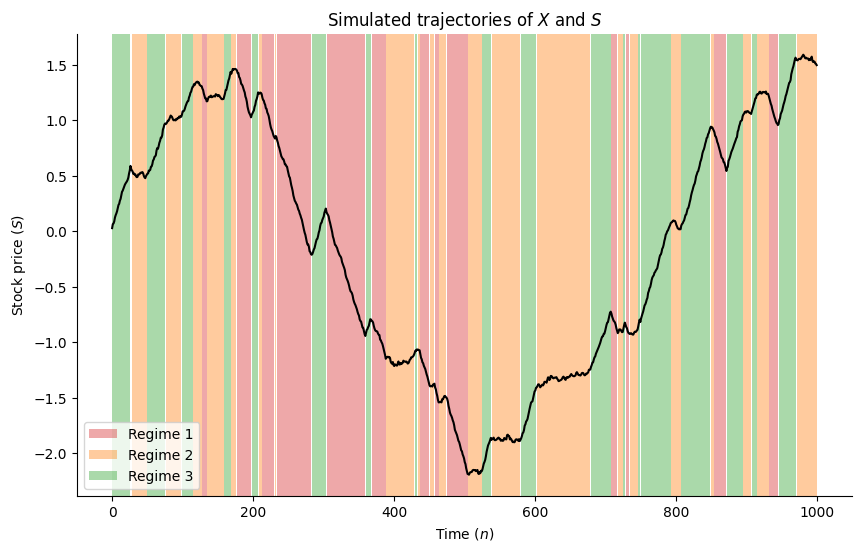

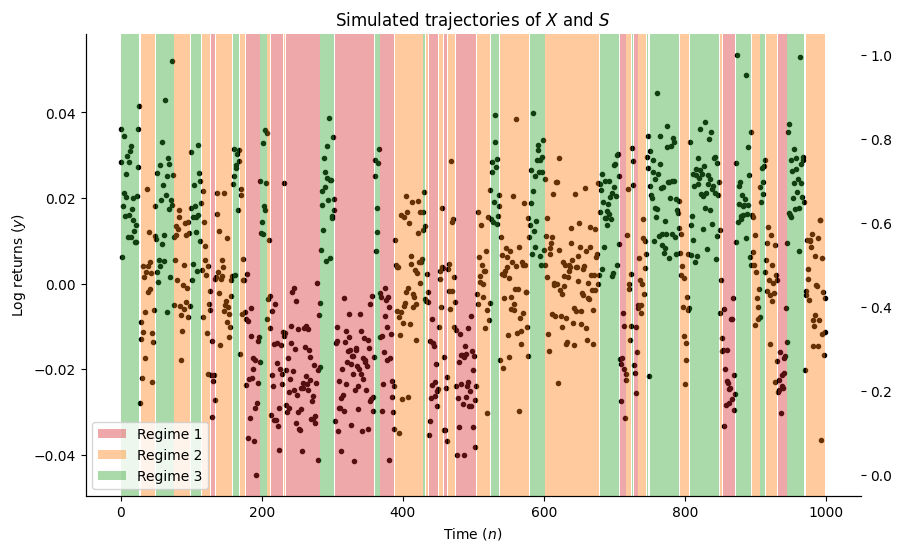

In [3]:
cmap = plt.get_cmap('RdYlGn_r')
palette = ['tab:red', 'tab:orange', 'tab:green']

ν = np.array([0.025, 0.025, 0.95])
Q = np.array([[0.95, 0.025, 0.025],[0.025, 0.95, 0.025],[0.025, 0.025, 0.95]])
M = np.array([-0.02, 0, 0.02])
Σ = np.array([0.01, 0.01, 0.01])
T = 1000

HMM = ma_hmm(ν, Q, M, Σ, T, 0)
HMM.simul(seed=121)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(HMM.true_y.cumsum(), color='black')
ax.set_ylabel('Stock price ($S$)')
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(palette):
    ax.fill_between(np.arange(1000), 0, 1, where=HMM.true_x==i, facecolor=color, transform=trans, alpha=.4, label='Regime ' + str(i+1))
ax.set_xlabel('Time ($n$)')
plt.title('Simulated trajectories of $X$ and $S$')
ax.legend()
sns.despine()
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(HMM.true_y, '.', color='black')
ax.set_ylabel('Log returns ($y$)')
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax2 = ax.twinx()
for i, color in enumerate(palette):
    ax2.fill_between(np.arange(1000), 0, 1, where=HMM.true_x==i, facecolor=color, transform=trans, alpha=.4, label='Regime ' + str(i+1))
ax.set_xlabel('Time ($n$)')
plt.title('Simulated trajectories of $X$ and $S$')
ax2.legend(loc=3)
sns.despine()
plt.show()